# neat-python

http://neat-python.readthedocs.io/en/latest/



In [5]:
# pip install neat-python

# wget https://raw.githubusercontent.com/CodeReclaimers/neat-python/master/examples/xor/visualize.py

# conda install -y graphviz

In [11]:
!pip install graphviz

In [12]:
import graphviz

## xor example from the docs

In [43]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import os
import neat
import visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config):

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 50)
    return p, stats

In [44]:
%%writefile xor.config

#--- parameters for the XOR-2 experiment ---#

[NEAT]
fitness_criterion     = max
fitness_threshold     = 3.9
pop_size              = 150
reset_on_extinction   = False

[DefaultGenome]
# node activation options
activation_default      = sigmoid
activation_mutate_rate  = 0.0
activation_options      = sigmoid

# node aggregation options
aggregation_default     = sum
aggregation_mutate_rate = 0.0
aggregation_options     = sum

# node bias options
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_max_value          = 30.0
bias_min_value          = -30.0
bias_mutate_power       = 0.5
bias_mutate_rate        = 0.7
bias_replace_rate       = 0.1

# genome compatibility options
compatibility_disjoint_coefficient = 1.0
compatibility_weight_coefficient   = 0.5

# connection add/remove rates
conn_add_prob           = 0.5
conn_delete_prob        = 0.5

# connection enable options
enabled_default         = True
enabled_mutate_rate     = 0.01

feed_forward            = True
initial_connection      = full

# node add/remove rates
node_add_prob           = 0.2
node_delete_prob        = 0.2

# network parameters
num_hidden              = 0
num_inputs              = 2
num_outputs             = 1

# node response options
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_max_value      = 30.0
response_min_value      = -30.0
response_mutate_power   = 0.0
response_mutate_rate    = 0.0
response_replace_rate   = 0.0

# connection weight options
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_max_value        = 30
weight_min_value        = -30
weight_mutate_power     = 0.5
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation       = 20
species_elitism      = 2

[DefaultReproduction]
elitism            = 2
survival_threshold = 0.2


Overwriting xor.config



 ****** Running generation 0 ****** 

Population's average fitness: 2.18332 stdev: 0.35267
Best fitness: 2.99717 - size: (1, 2) - species 1 - id 138
Average adjusted fitness: 0.579
Mean genetic distance 1.199, standard deviation 0.470
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.579     0
Total extinctions: 0
Generation time: 0.061 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.32554 stdev: 0.32189
Best fitness: 2.99717 - size: (1, 2) - species 1 - id 138
Average adjusted fitness: 0.423
Mean genetic distance 1.293, standard deviation 0.448
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.423     1
Total extinctions: 0
Generation time: 0.025 sec (0.043 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.31863 stdev: 

Mean genetic distance 2.897, standard deviation 1.441
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20    39      3.3    0.285     3
     2   17    36      3.0    0.299     0
     3    8    55      3.0    0.468     7
     4    0    20       --       --     0
Total extinctions: 0
Generation time: 0.038 sec (0.039 average)

 ****** Running generation 21 ****** 

Population's average fitness: 2.42567 stdev: 0.48053
Best fitness: 3.29649 - size: (2, 3) - species 1 - id 3201
Average adjusted fitness: 0.573
Mean genetic distance 2.910, standard deviation 1.356
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   21    64      3.3    0.561     0
     2   18    36      3.0    0.612     1
     3    9    45      3.0    0.675     8
     4    1     6      3.0    0.444     0
Total extinctions: 0
Generation time: 0.047 sec (0.041 avera


 ****** Running generation 35 ****** 

Population's average fitness: 2.40712 stdev: 0.48693
Best fitness: 3.53372 - size: (4, 7) - species 3 - id 5050
Average adjusted fitness: 0.542
Mean genetic distance 2.718, standard deviation 1.331
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   35    31      3.2    0.528    14
     2   32    27      3.0    0.529     1
     3   23    34      3.5    0.598     1
     4   15    58      3.3    0.514     0
Total extinctions: 0
Generation time: 0.041 sec (0.042 average)

 ****** Running generation 36 ****** 

Population's average fitness: 2.36400 stdev: 0.48807
Best fitness: 3.53372 - size: (4, 7) - species 3 - id 5050
Average adjusted fitness: 0.534
Mean genetic distance 2.673, standard deviation 1.274
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   36    19      3.5    0.480     0
  

Mean genetic distance 3.115, standard deviation 1.047
Population of 151 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   48    20      3.3    0.429    12
     2   45    17      3.0    0.535     7
     3   36    26      3.5    0.517     4
     4   28    21      3.0    0.503     3
     5   11    21      3.0    0.562     2
     6    4    14      2.6    0.378     1
     7    1    29      3.8    0.552     0
     8    0     3       --       --     0
Total extinctions: 0
Generation time: 0.054 sec (0.046 average)

 ****** Running generation 49 ****** 

Population's average fitness: 2.39444 stdev: 0.50516
Best fitness: 3.77479 - size: (4, 7) - species 7 - id 6445
Average adjusted fitness: 0.483
Mean genetic distance 3.031, standard deviation 1.013
Population of 150 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   49     9      3.3    0.474    13
     2   46    17 

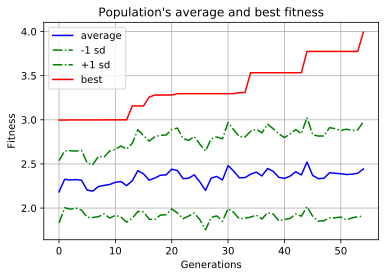

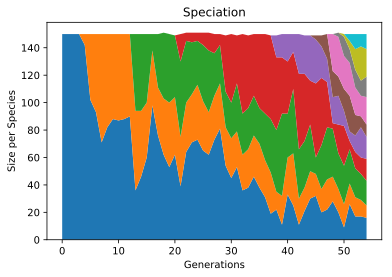

Mean genetic distance 1.772, standard deviation 0.630
Mean genetic distance 1.745, standard deviation 0.602
Mean genetic distance 1.807, standard deviation 0.588
Mean genetic distance 1.773, standard deviation 0.595
Mean genetic distance 1.766, standard deviation 0.573
Mean genetic distance 1.895, standard deviation 0.571
Mean genetic distance 2.008, standard deviation 0.683
Mean genetic distance 2.114, standard deviation 0.682
Mean genetic distance 2.058, standard deviation 0.581
Mean genetic distance 2.113, standard deviation 0.712
Mean genetic distance 2.038, standard deviation 0.731
Mean genetic distance 1.943, standard deviation 0.763
Mean genetic distance 1.877, standard deviation 0.692
Mean genetic distance 1.989, standard deviation 0.712
Mean genetic distance 2.201, standard deviation 0.880
Mean genetic distance 2.237, standard deviation 0.841
Mean genetic distance 2.192, standard deviation 0.829
Mean genetic distance 2.128, standard deviation 0.770
Mean genetic distance 2.078,

In [45]:
# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     "xor.config")

p, stats = run(config)

In [46]:
p.best_genome

In [47]:
best = neat.nn.FeedForwardNetwork.create(p.best_genome, config)

In [50]:
best.activate([1, 1])

[0.08319186357828856]